In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('C:/Users/Lenovo/Desktop/Ram_Perceptrons/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def impute_age(cols):
    Age= cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [4]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age,axis=1)

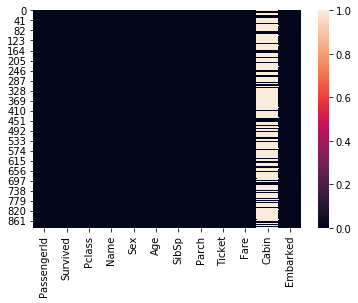

In [5]:
sb.heatmap(dataset.isnull())

In [6]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embarked=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [7]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [8]:
dataset=pd.concat([dataset,sex,embarked],axis=1)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
 from sklearn.model_selection import train_test_split
    
X_train,X_test,y_train,y_test=train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'],test_size=0.2,random_state=101)

# Gradient boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
learning_rates=[0.05,0.1,0.25,0.5,0.75,1.0]
for learning_rates in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate= learning_rates,random_state=0)
    gb.fit(X_train,y_train)
    print('Learning rate: ',learning_rates)
    print('Accuracy score(training): {0:.3f}'.format(gb.score(X_train,y_train)))
    print('Accuracy score(validation): {0:.3f}'.format(gb.score(X_test,y_test)))
    print()

Learning rate:  0.05
Accuracy score(training): 0.837
Accuracy score(validation): 0.788

Learning rate:  0.1
Accuracy score(training): 0.844
Accuracy score(validation): 0.816

Learning rate:  0.25
Accuracy score(training): 0.867
Accuracy score(validation): 0.810

Learning rate:  0.5
Accuracy score(training): 0.893
Accuracy score(validation): 0.821

Learning rate:  0.75
Accuracy score(training): 0.914
Accuracy score(validation): 0.777

Learning rate:  1.0
Accuracy score(training): 0.933
Accuracy score(validation): 0.816



In [12]:
gb=GradientBoostingClassifier(learning_rate=0.1,random_state=0)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.89      0.70      0.78        80

   micro avg       0.83      0.83      0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



In [14]:
confusion_matrix(y_pred,y_test)

array([[92, 24],
       [ 7, 56]], dtype=int64)

# ROC curve

In [15]:
auc=roc_auc_score(y_test,y_pred)
auc

0.8146464646464646

In [16]:
def curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='orange',linestyle='--')

In [17]:
probs=gb.predict_proba(X_test)
probs=probs[:,1]

In [18]:
fpr,tpr,threshold=roc_curve(y_test,probs)

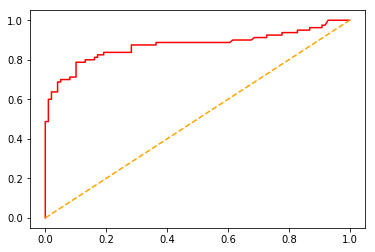

In [19]:
curve(fpr,tpr)